<a href="https://colab.research.google.com/github/Diana-Aish/EDSA_projects/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Here is the url provided for you
url = "https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv"

In [ ]:
# use pd.read_csv() to import the data
gapminder=pd.read_csv(url)

In [ ]:
# use pd.read_csv() to import the data
gapminder=pd.read_csv(url)

In [ ]:
# Check the last few obs
gapminder.tail()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462.0,3.85,15.1,0.654323,22.02660,1286.0,131.9745,49.0,98.3,Sub-Saharan Africa


In [ ]:
# check the data information
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [ ]:
#  Desriptive statistics
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


Select Target and Feature Variable
This is a simple linear regression, so we are going to use only two variables. Suppose you wish to predict life expectancy in a given country using one variable such as GDP, fertility rate, or population.

Before selecting the condidate input variable, we will plot a heatmap on the correlation matrix of dataset, then we select to highly correlated variable with the target, which will be life

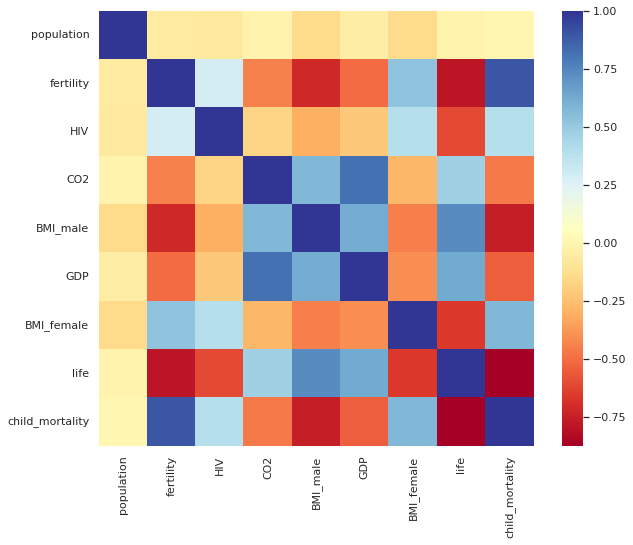

In [ ]:
# Setting the figure size 
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(gapminder.corr(), cmap='RdYlBu', square=True)

From the headmap, the highly negatively correlated variable is fertility, which the one you are going to use to build your model. So:

Target is: life

Input is: fertility

In [ ]:
# Rename life as y
y=gapminder.life
data_re=gapminder.rename(columns={"life":"y"},inplace=False)
data_re

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,y,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [ ]:
# Rename the input variable as X
x=gapminder.fertility
data_ren=data_re.rename(columns={"fertility":"x"},inplace=False)
data_ren

,population,x,HIV,CO2,BMI_male,GDP,BMI_female,y,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [ ]:
# Check the shape of y
print("The shape of the target variable is :" ,y.shape )

The shape of the target variable is : (139,)


In [ ]:
# Check the shape of X
print("The shape of the input variable is :",x.shape )

The shape of the input variable is : (139,)


In [ ]:
# reshape the target variable y
y_reshape=np.array(y).reshape(-1, 1)

In [ ]:
# reshape the input variable X
x_reshape=np.array(x).reshape(-1,1)

In [ ]:
# print the new shape y
x_reshape.shape

(139, 1)

In [ ]:
# print the new shape of X
y_reshape.shape

(139, 1)

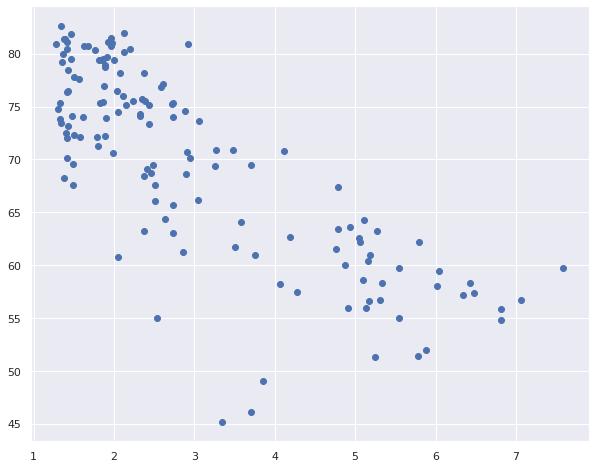

In [ ]:
# plot scatter plot 
plt.scatter(x = gapminder['fertility'], y = gapminder['life']) 

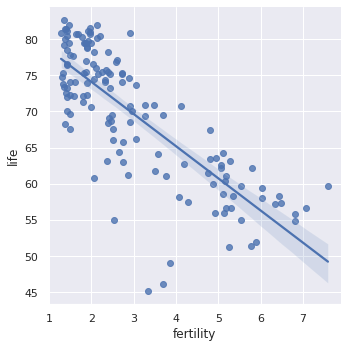

In [ ]:
# plot linear regression plot.
sns.lmplot(x= 'fertility', y = 'life', data = gapminder)

Building a Linear Regression Model

In [ ]:
# Create lm object
simple_reg = linear_model.LinearRegression()
lm = LinearRegression()

In [ ]:
# fit the linear model
reg=lm.fit(x_reshape,y_reshape)

In [ ]:
# Print the intercept 
print("The model intercept is: ",reg.intercept_)
# Print the coef 
print("The model parameter is: ",reg.coef_)


The model intercept is:  [82.95721362]
The model parameter is:  [[-4.44387899]]


In [ ]:
# Print the Godness-of-fit metric 
print("The coefficient of determination is:{:0.3f} ".format(lm.score(x_reshape, y_reshape)))

The coefficient of determination is:0.619 


In [ ]:
# Predict on the data
y_pred=reg.predict(x_reshape)

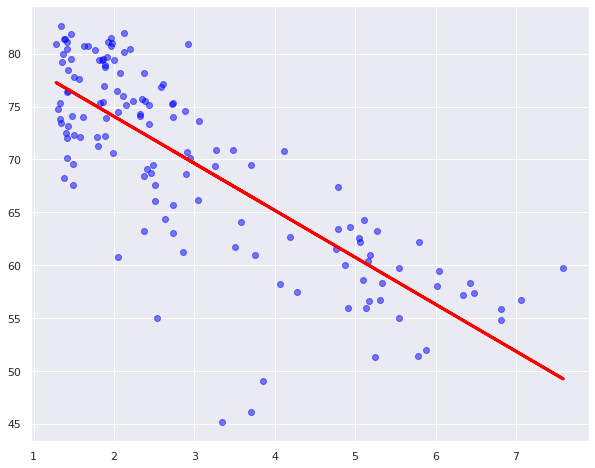

In [ ]:
# Plot the fitted line on top of the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)
plt.plot(x_reshape, y_pred, color='red', linewidth=3)
plt.show()